## Observations and Insights 

The analysis show that the campomulin an the ramicane are the most efficient in decreasing the tumor volume.
The linear regression indicate the volume of the tumor will increase if the weight of the mouse increase.
The corellation between the mouse weight and the tumor volume is up to 84% which mean that the model is highly accurate.
The pie plot indicates that the sex isn't a main factor that will impact the analysis.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress as LR
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
uniquemice = mouse_metadata['Mouse ID'].nunique()
uniquemice 

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplic_mouses = data_df.groupby('Mouse ID')['Timepoint'].nunique()
duplic_mouses



Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Timepoint, Length: 249, dtype: int64

In [4]:
duplic_mouse_id= data_df.loc[data_df.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplic_mouse_id

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplic_mouses_data = data_df.loc[data_df['Mouse ID'] == 'g989']
duplic_mouses_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data_df[data_df['Mouse ID'].isin(duplic_mouse_id)==False]
clean_df=clean_df.reset_index()
#len(clean_df)
clean_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1875,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1876,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1877,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1878,1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary dataframe.
summary_stat_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': variance,
    'Standard Deviation': std,
    'SEM': sem
})
summary_stat_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
#first create a group series using the 'Drug Regimen' column and, counting the number of data points for each Drug Regimen 
mice_count = clean_df["Drug Regimen"].value_counts()
mice_count


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Time Points')

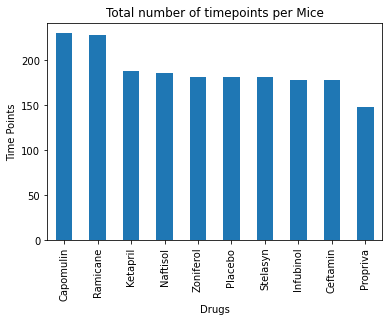

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Set the xlabel, ylabel, and title using class methods
mice_count.plot(kind='bar')
plt.title('Total number of timepoints per Mice')
plt.xlabel('Drugs')
plt.ylabel('Time Points')


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Calculate the distribution of female vs. male
male_female_dist = clean_df['Sex'].value_counts()
male_female_dist


Male      958
Female    922
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x263b244e670>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51%'),
  Text(0.018044734954153686, -0.5997285948997549, '49%')])

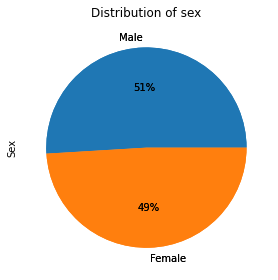

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_female_dist.plot(kind='pie',autopct='%1.0f%%')
plt.title('Distribution of sex')
plt.tight_layout()
plt.pie(male_female_dist, labels = ['Male', 'Female'], autopct='%1.0f%%')


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Filter the data and store it into seperated dataframe

Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes  
# add subset 
# Determine outliers using upper and lower bounds
#------- Same process for each tumor-----------""
# Capomulin

Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_volume = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_volume, clean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()



,Mouse ID,Timepoint,index,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,309,Capomulin,Female,9,22,38.982878,2
1,b742,45,299,Capomulin,Male,7,21,38.939633,0
2,f966,20,64,Capomulin,Male,16,17,30.485985,0
3,g288,45,244,Capomulin,Male,3,19,37.074024,1
4,g316,45,360,Capomulin,Female,22,22,40.159220,2


In [15]:
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iqr = upper_q-lower_q

print("---------------Capomulin tumors--------------")
print(f"Lower quartiles : {lower_q}")
print(f"Upper quartile: {upper_q}")
print(f"Interquartile ranges: {iqr}")
print(f"Median: {quartiles[0.5]}")

lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

print(f"Values that are inferior to {lower_bound} could be outliers.")
print(f"Values that are superiror to {upper_bound} could be outliers.")

# Ramicane
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_volume = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_volume, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iqr = upper_q-lower_q

print("---------------Ramicane tumors--------------")
print(f"Lower quartiles : {lower_q}")
print(f"Upper quartile: {upper_q}")
print(f"Interquartile range: {iqr}")
print(f"Median: {quartiles[0.5]}")

lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

print(f"Values that are inferior to {lower_bound} could be outliers.")
print(f"Values that are superiror to {upper_bound} could be outliers.")


# Infubinol
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_volume = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_volume, clean_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iqr = upper_q-lower_q

print("---------------Infubinol tumors--------------")
print(f"Lower quartiles : {lower_q}")
print(f"Upper quartile: {upper_q}")
print(f"Interquartile range: {iqr}")
print(f"Median: {quartiles[0.5]}")

lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

print(f"Values that are inferior to {lower_bound} could be outliers.")
print(f"Values that are superiror to {upper_bound} could be outliers.")

# Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_volume = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_volume, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles =Ceftamin_tumors.quantile([.25,.5,.75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iqr = upper_q-lower_q

print("---------------Ceftamin tumors--------------")
print(f"Lower quartiles : {lower_q}")
print(f"Upper quartile: {upper_q}")
print(f"Interquartile range: {iqr}")
print(f"Median: {quartiles[0.5]}")

lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

print(f"Values that are inferior to {lower_bound} could be outliers.")
print(f"Values that are superiror to {upper_bound} could be outliers.")


---------------Capomulin tumors--------------
Lower quartiles : 32.37735684
Upper quartile: 40.1592203
Interquartile ranges: 7.781863460000004
Median: 38.1251644
Values that are inferior to 20.70456164999999 could be outliers.
Values that are superiror to 51.83201549 could be outliers.
---------------Ramicane tumors--------------
Lower quartiles : 31.56046955
Upper quartile: 40.65900627
Interquartile range: 9.098536719999998
Median: 36.56165229
Values that are inferior to 17.912664470000003 could be outliers.
Values that are superiror to 54.30681135 could be outliers.
---------------Infubinol tumors--------------
Lower quartiles : 54.04860769
Upper quartile: 65.52574285
Interquartile range: 11.477135160000003
Median: 60.16518046
Values that are inferior to 36.83290494999999 could be outliers.
Values that are superiror to 82.74144559000001 could be outliers.
---------------Ceftamin tumors--------------
Lower quartiles : 48.72207785
Upper quartile: 64.29983003
Interquartile range: 15.577

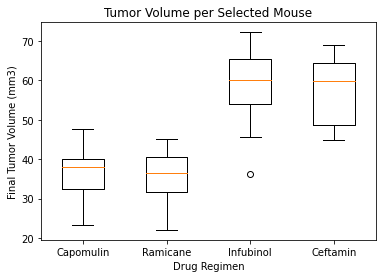

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_box_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
data_box_plot_labels = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']


fig, ax = plt.subplots()
ax.set_title('Tumor Volume per Selected Mouse')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')
ax.boxplot(data_box_plot, labels=data_box_plot_labels, widths = 0.5, vert=True)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

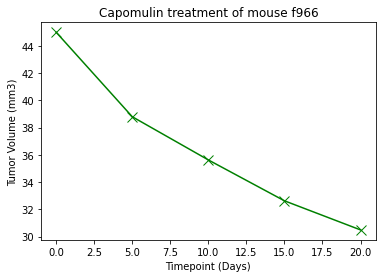

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "f966",:]
x_axis = line_df["Timepoint"]
tumor_volume= line_df["Tumor Volume (mm3)"]

fig, ax = plt.subplots()
plt.title('Capomulin treatment of mouse f966')
plt.plot(x_axis, tumor_volume,linewidth=1.5, markersize=10,marker="x",color="green", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

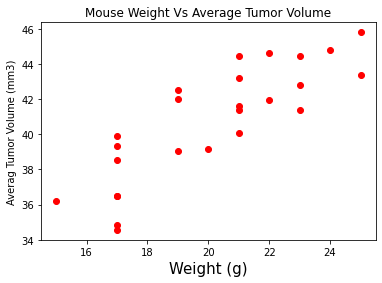

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig, ax = plt.subplots()

mean_capomulin_vol =Capomulin_df.groupby(['Mouse ID']).mean()


plt.scatter(mean_capomulin_vol['Weight (g)'],mean_capomulin_vol['Tumor Volume (mm3)'], color="red")
plt.title('Mouse Weight Vs Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =15)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 

Corr = st.pearsonr(mean_capomulin_vol['Weight (g)'],mean_capomulin_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(Corr[0],2)}")

#get the linear regression parameters

(slope, intercept,rvalue, pvalue, stderr)= LR(mean_capomulin_vol["Weight (g)"],mean_capomulin_vol["Tumor Volume (mm3)"])
regress_values=mean_capomulin_vol["Weight (g)"]* slope + intercept

#LR equation
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"


The correlation between mouse weight and the average tumor volume is 0.84


The r-squared is: 0.709


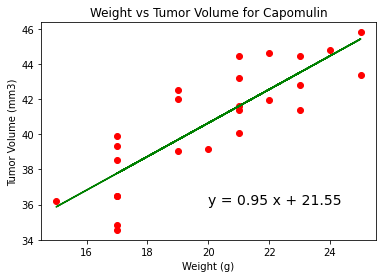

In [23]:
# for mouse weight and average tumor volume for the Capomulin regimen

plt.scatter(mean_capomulin_vol["Weight (g)"],mean_capomulin_vol["Tumor Volume (mm3)"],color='r')
plt.plot(mean_capomulin_vol["Weight (g)"], regress_values, color='green')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()